In [150]:
import os
import pandas as pd
import numpy as np
import warnings 
import matplotlib.pyplot as plt
import seaborn as sns
from main import *


# Warning because some galaxies (those are not of orur interest have mass/ halo concentration 0, which we logarithmize)
warnings.filterwarnings("ignore")

%matplotlib inline 
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Get ELG and LRG data

In [178]:
data_1, coordinates_1 = Sample_selection(861*5, "ELG", subhalos, halos, halo_concentration, 9.086, return_interpol=False, max_conc=100)
data_2, coordinates_2 = Sample_selection(861*2, "LRG", subhalos, halos, halo_concentration, 9.086, return_interpol=False, max_conc=100)

path= "../data/datasets" # save datasets on the right location first (run 'data_preprocessing/main.py')
ELGs = pd.read_csv(os.path.join(path, "ELG", "n5e-4_ssfr908.csv"))
LRGs = pd.read_csv(os.path.join(path, "LRG", "n2e-4_ssfr908.csv"))

ELG2s = pd.read_csv(os.path.join(path, "ELG", "n5e-4_ssfr923.csv"))
LRG2s = pd.read_csv(os.path.join(path, "LRG", "n2e-4_ssfr923.csv"))

# Presentation of the simulation

In [138]:
# present subbox (50x50x50 Mpc/h) of the simulation (arbitrary selected edges of the subbox)
x_lim = [50_000, 100_000]
y_lim = [50_000, 100_000]
z_lim = [50_000, 100_000]

elg_data = data_1.iloc[(coordinates_1[:, 0]<x_lim[1]) & (coordinates_1[:, 0]>x_lim[0]) & (coordinates_1[:, 1]<y_lim[1]) & (coordinates_1[:, 1]>y_lim[0]) & (coordinates_1[:, 2]<z_lim[1]) & (coordinates_1[:, 2]>z_lim[0])]
elg_cor = coordinates_1[(coordinates_1[:, 0]<x_lim[1]) & (coordinates_1[:, 0]>x_lim[0]) & (coordinates_1[:, 1]<y_lim[1]) & (coordinates_1[:, 1]>y_lim[0]) & (coordinates_1[:, 2]<z_lim[1]) & (coordinates_1[:, 2]>z_lim[0])]
lrg_data = data_2.iloc[(coordinates_2[:, 0]<x_lim[1]) & (coordinates_2[:, 0]>x_lim[0]) & (coordinates_2[:, 1]<y_lim[1]) & (coordinates_2[:, 1]>y_lim[0]) & (coordinates_2[:, 2]<z_lim[1]) & (coordinates_2[:, 2]>z_lim[0])]
lrg_cor = coordinates_2[(coordinates_2[:, 0]<x_lim[1]) & (coordinates_2[:, 0]>x_lim[0]) & (coordinates_2[:, 1]<y_lim[1]) & (coordinates_2[:, 1]>y_lim[0]) & (coordinates_2[:, 2]<z_lim[1]) & (coordinates_2[:, 2]>z_lim[0])]

elg_mass = elg_data["mass"] # not standardized/normalized 
lrg_mass = lrg_data["mass"]

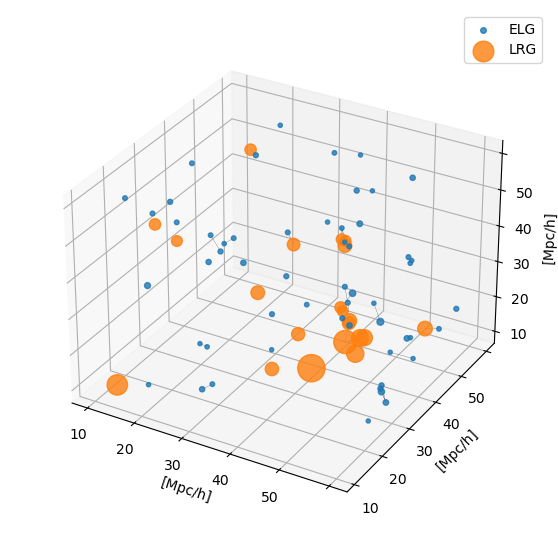

In [143]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection='3d')
# ax.set_title("ELG and LRG galaxies",fontweight="bold")
x,y,z = [i/1000 for i in elg_cor[:,0]], [i/1000 for i in elg_cor[:,1]], [i/1000 for i in elg_cor[:,2]]
ax.scatter(x,y,z,s=elg_mass*5,alpha=0.8, label="ELG")

x,y,z = [i/1000 for i in lrg_cor[:,0]], [i/1000 for i in lrg_cor[:,1]], [i/1000 for i in lrg_cor[:,2]]
ax.scatter(x,y,z,s=lrg_mass*5,alpha=0.8, label="LRG")

ax.set_xticklabels([f"{int(i)}" for i in np.arange(0,60,10)])
ax.set_yticklabels([f"{int(i)}" for i in np.arange(0,60,10)])
ax.set_zticklabels([f"{int(i)}" for i in np.arange(0,60,10)])

ax.set_xlabel("[Mpc/h]") #,fontsize=14,rotation=90, labelpad =0 ))
ax.set_ylabel("[Mpc/h]") #,fontsize=14,rotation=90, labelpad =0 ))
ax.set_zlabel("[Mpc/h]") #,fontsize=14,rotation=90, labelpad =0 )

coordinates = np.vstack([elg_cor, lrg_cor])
kd_tree = spatial.KDTree(coordinates)

all_x_connections=[]
for cor in coordinates:
    neigh = kd_tree.query_ball_point(cor, 5_000, p=2.0)
    for i in neigh:
        x_ = [cor[0]/1000., coordinates[i,0]/1000.] # Mpc/h -> kpc/h
        y_ = [cor[1]/1000., coordinates[i,1]/1000.]
        z_ = [cor[2]/1000., coordinates[i,2]/1000.]
        if x_[0]!=x_[1] and y_[0]!=y_[1] and z_[0]!=z_[1] and x_ not in all_x_connections:
            ax.plot(x_, y_, z_, color='black', lw=0.1, ls="--")
            all_x_connections.append(x_)

ax.legend(scatterpoints=1)
ax.dist = 11
# plt.savefig("simulation_presentation.pdf", bbox_inches='tight')

# Plot correlations

In [148]:
cor_features = ["lum_z", "lum_g", "lum_r", "mass", "sum_m","sum_V", "anisotropy", "neigh1", "neigh5"]
names_to_plot = ["z-band", "g-band", "r-band", r"M$^*$", r"$\sum M_i^*$", r"$\sum M^*_i/d_i$", "A", r"N$_{1 Mpc/h}$", r"N$_{5 Mpc/h}$"]

<AxesSubplot: title={'center': 'ELG-like galaxies'}>

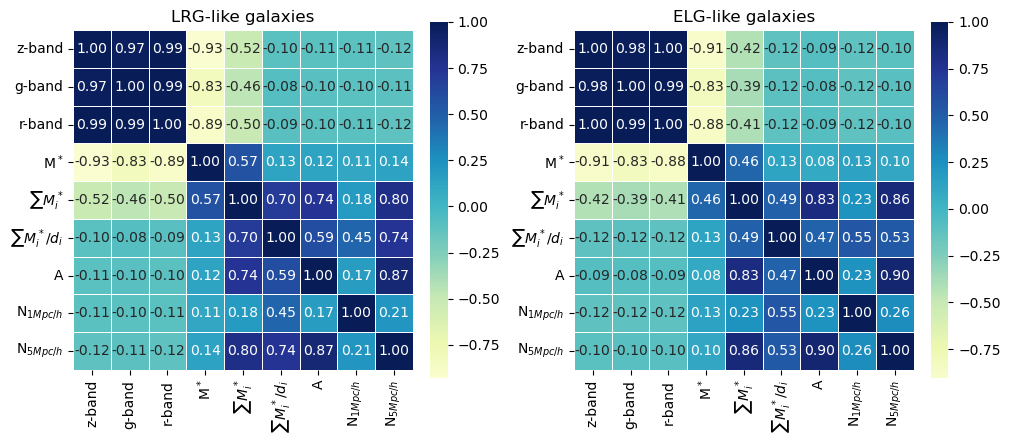

In [151]:
fig, axes=plt.subplots(1,2,figsize=(10,9),constrained_layout=True)
    axes[0].set_title("LRG-like galaxies") # , fontweight="bold"
    axes[1].set_title("ELG-like galaxies") # , fontweight="bold"
    
cor_lrg = LRGs[cor_features].corr()
sns.heatmap(cor_lrg, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
            square=True, xticklabels=names_to_plot, yticklabels=names_to_plot, linewidths=.5, annot=True, cbar_kws={"shrink": .40}, ax=axes[0])

cor_elg = ELGs[cor_features].corr()
sns.heatmap(cor_elg, vmax=1.0, center=0, fmt='.2f', cmap="YlGnBu",
            square=True,xticklabels=names_to_plot, yticklabels=names_to_plot, linewidths=.5, annot=True, cbar_kws={"shrink": .40}, ax=axes[1])

# plt.savefig("correlation.pdf", bbox_inches='tight')

# Plot distributions (ELG and LRG-like galaxies)
## Halo properties

### Scatter comparison

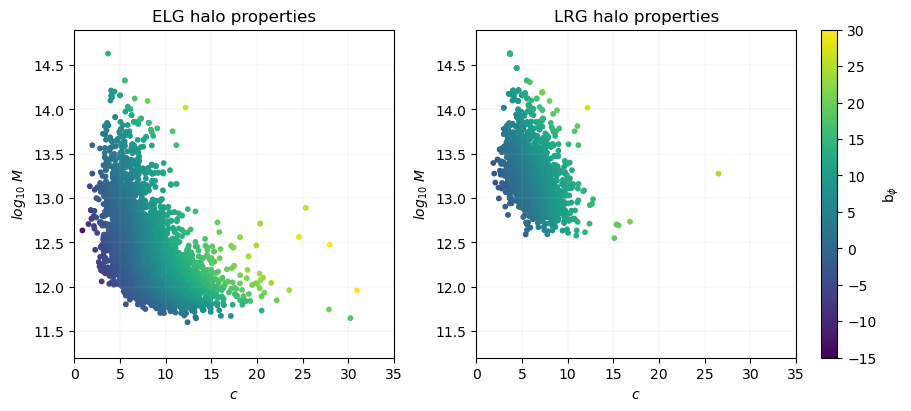

In [190]:
fig,axes=plt.subplots(1,2,figsize=(9,4),constrained_layout=True)
# axes.suptitle("",fontweight="bold")
axes[0].set_title("ELG halo properties")
axes[1].set_title("LRG halo properties")

cp = axes[0].scatter(ELGs["halo_conc"], ELGs["halo_mass"], c=ELGs["b_phi"], s = 10,  cmap = "viridis", vmin=-15, vmax=30)
cp = axes[1].scatter(LRGs["halo_conc"], LRGs["halo_mass"], c=LRGs["b_phi"], s = 10,  cmap = "viridis", vmin=-15, vmax=30)
fig.colorbar(cp, label = "b$_\phi$")

for i in range(2):
    axes[i].set_xlim((0,35))
    axes[i].set_ylim((11.2,14.9))
    axes[i].set_xlabel("$c$")
    axes[i].set_ylabel(r"$log_{10}\ M$")
    axes[i].grid(lw=0.1)
    
# plt.savefig("halo_properties.pdf", bbox_inches='tight')

### Histogram

In [175]:
properties = ["halo_mass", "halo_conc", "b_phi"]
stat = dict()
for prop in properties:
    for gal_type in ["ELG", "LRG"]:
        sample = ELGs if gal_type == "ELG" else LRGs
        stat[gal_type+ "_" + prop+"_mean"] = round(np.mean(sample[prop]),2)
        stat[gal_type+ "_" + prop+"_std"] = round(np.std(sample[prop]),2)

Text(0.5, 0, 'log M')

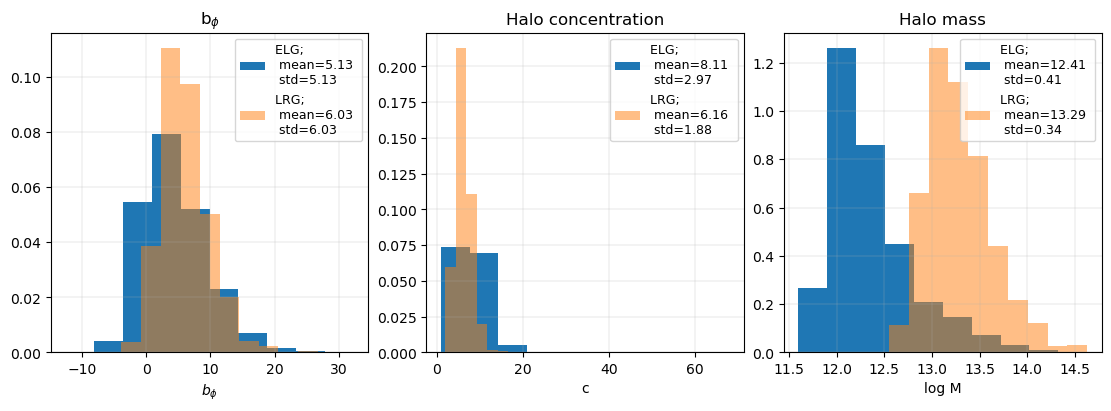

In [191]:
fig, axes = plt.subplots(1,3, figsize=(11,4),constrained_layout=True)

# fig.suptitle("LRG and ELG halo properties; normalized distributions",fontweight="bold")
axes[0].set_title("b$_\phi$") # , fontweight="bold"
axes[1].set_title("Halo concentration") # , fontweight="bold"
axes[2].set_title("Halo mass") # , fontweight="bold"

axes[0].hist(ELGs["b_phi"], density=True, label=f"ELG; \n mean={stat['ELG_b_phi_mean']} \n std={stat['ELG_b_phi_mean']}")
axes[0].hist(LRGs["b_phi"], density=True, label=f"LRG; \n mean={stat['LRG_b_phi_mean']} \n std={stat['LRG_b_phi_mean']}",alpha=0.5)

axes[1].hist(ELGs["halo_conc"], density=True, label=f"ELG; \n mean={stat['ELG_halo_conc_mean']} \n std={stat['ELG_halo_conc_std']}")
axes[1].hist(LRGs["halo_conc"], density=True, label=f"LRG; \n mean={stat['LRG_halo_conc_mean']} \n std={stat['LRG_halo_conc_std']}",alpha=0.5, bins=10)

axes[2].hist(ELGs["halo_mass"], density=True, label=f"ELG; \n mean={stat['ELG_halo_mass_mean']} \n std={stat['ELG_halo_mass_std']}")
axes[2].hist(LRGs["halo_mass"], density=True, label=f"LRG; \n mean={stat['LRG_halo_mass_mean']} \n std={stat['LRG_halo_mass_std']}",alpha=0.5)

for i in range(3):
    axes[i].grid(lw=0.2)
    axes[i].legend(fontsize=9)
    
axes[0].set_xlabel("$b_\phi$")
axes[1].set_xlabel("c")
axes[2].set_xlabel("log M")

# plt.savefig("halo_properties_hist.pdf", bbox_inches='tight')

## Galaxy properties

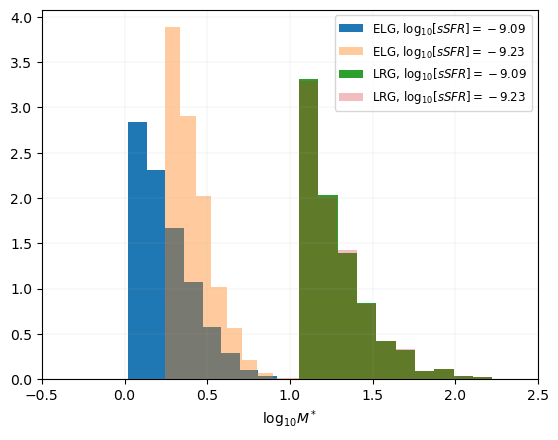

In [198]:
plt.tight_layout()
plt.hist(ELGs["mass"], density=True, label=r"ELG, log$_{10}[sSFR] = -9.09$")
plt.hist(ELGs2["mass"], density=True, label=r"ELG, log$_{10}[sSFR] = -9.23$",alpha=0.4)
plt.hist(LRGs["mass"], density=True, label=r"LRG, log$_{10}[sSFR] = -9.09$")
plt.hist(LRGs2["mass"], density=True, label=r"LRG, log$_{10}[sSFR] = -9.23$",alpha=0.3)

plt.legend(fontsize=8.5)
plt.xlim(-.5,2.5)
plt.xlabel("log$_{10} M^*$")
plt.grid(lw=0.1)

# plt.savefig("stellar_mass.pdf", bbox_inches='tight')

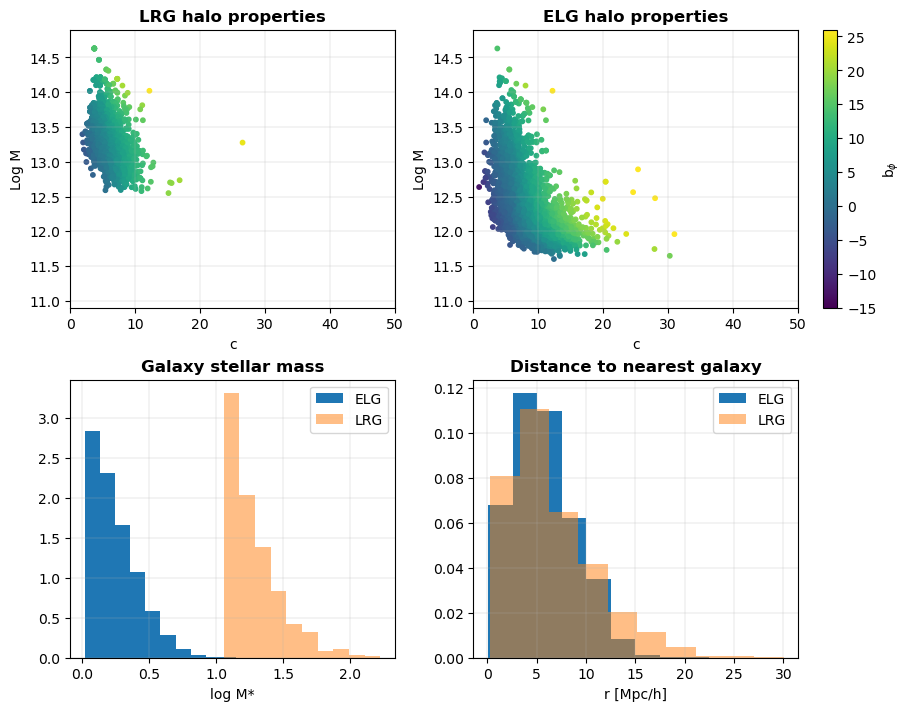

In [203]:
fig,axes=plt.subplots(2,2,figsize=(9,7),constrained_layout=True)
#fig.suptitle("Properties of LRG and ELG galaxies",fontweight="bold")

axes[0,0].set_title("LRG halo properties",fontweight="bold")
axes[0,1].set_title("ELG halo properties",fontweight="bold")
axes[1,0].set_title("Galaxy stellar mass",fontweight="bold")
axes[1,1].set_title("Distance to nearest galaxy",fontweight="bold")

        
axes[0,0].grid(lw=0.2)
axes[0,1].grid(lw=0.2)

# Halo properties scatter
axes[0,0].set_xlabel("c")
axes[0,1].set_xlabel("c")
axes[0,0].set_ylabel("Log M")
axes[0,1].set_ylabel("Log M")

cp = axes[0,0].scatter(LRGs["halo_conc"], LRGs["halo_mass"], c=LRGs["b_phi"], s = 10,  cmap = "viridis", vmin=-15, vmax=26)
#fig.colorbar(cp, label = "b$_\phi$")

cp = axes[0,1].scatter(ELGs["halo_conc"], ELGs["halo_mass"], c=ELGs["b_phi"], s = 10,  cmap = "viridis", vmin=-15, vmax=26)
fig.colorbar(cp, label = "b$_\phi$")

axes[0,0].set_xlim((0,50))
axes[0,1].set_xlim((0,50))
axes[0,0].set_ylim((10.9,14.9))
axes[0,1].set_ylim((10.9,14.9))

# Galaxy properties (normalized) distributions
axes[1,0].hist(ELGs["mass"],density=True, label=f"ELG")#; \n mean={mean_elg_m}")
axes[1,0].hist(LRGs["mass"],density=True, label=f"LRG", alpha=0.5)#; \n mean={mean_lrg_m}", alpha=0.5)
axes[1,1].hist([i/1000 for i in ELGs["dist0"].values],density=True, label=f"ELG")#; \n mean={mean_elg_dist}")
axes[1,1].hist([i/1000 for i in LRGs["dist0"].values],density=True, label=f"LRG", alpha=0.5)#; \n mean={mean_lrg_dist}", alpha=0.5)


axes[1,0].set_xlabel("log M*")
axes[1,1].set_xlabel("r [Mpc/h]")
axes[1,0].grid(lw=0.2)
axes[1,1].grid(lw=0.2)

axes[1,0].legend()
axes[1,1].legend()

# plt.savefig("galaxy_properties.pdf", bbox_inches='tight')

## All distributions

Just change 'data' in the first line to plot for different sample

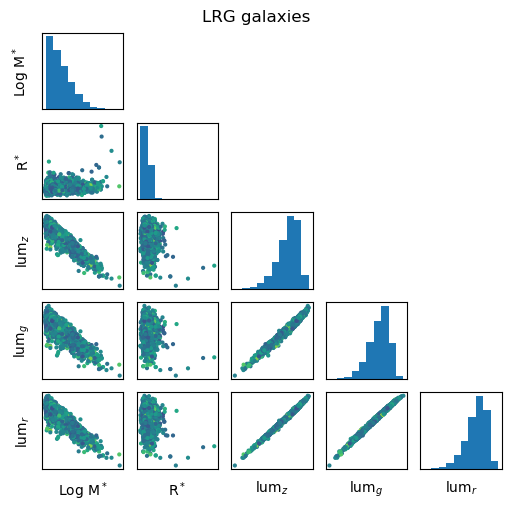

In [187]:
data = ELGs
fig,axes = plt.subplots(5,5, figsize=(5,5), constrained_layout=True)
fig.suptitle("LRG galaxies") # , fontweight="bold"

to_plot = ["mass", "rad", "lum_z", "lum_g", "lum_r"]
to_name = ["Log M$^*$", "R$^*$", "lum$_z$", "lum$_g$", "lum$_r$"]

for i in range(5):
    axes[i,i].hist(data[to_plot[i]])
    axes[i,0].set_ylabel(to_name[i])
    axes[4,i].set_xlabel(to_name[i])

for j in range(5):
    for i in range(5):
        if i>j:
            axes[i,j].scatter(data[to_plot[j]], data[to_plot[i]] , s=4, c=data["b_phi"], cmap = "viridis", vmin=-15, vmax=30)
        axes[i,j].set_xticks([])
        axes[i,j].set_yticks([])
        

for i in range(5):
    for j in range(i+1,5):
        axes[i,j].axis(('off'))